In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Load MNIST data 
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Inputs (training set) shape: {x_train.shape}")
print(f"Labels (training set) shape: {y_train.shape}")

Inputs (training set) shape: (60000, 28, 28)
Labels (training set) shape: (60000,)


In [3]:
# Normalize pixel values to 0-1 for faster learning and better performance
x_train = x_train.reshape((x_train.shape[0], 28, 28)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28)).astype('float32') / 255

print(f"Inputs (training set) shape: {x_train.shape}")
print(f"Labels (training set) shape: {y_train.shape}")

Inputs (training set) shape: (60000, 28, 28)
Labels (training set) shape: (60000,)


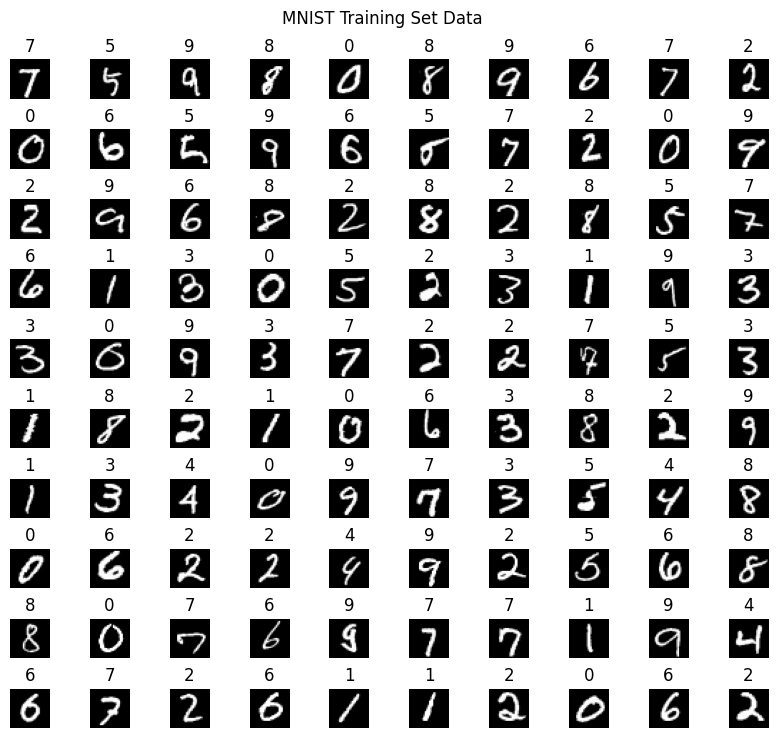

In [4]:
# Visualize MNIST training data with labels 
test_length, img_width, img_height = x_train.shape

fig, axs = plt.subplots(10,10, figsize=(8,8))
fig.suptitle("MNIST Training Set Data")
fig.tight_layout(pad=0.1, rect=[0, 0.05, 1, 0.95])

for i, ax in enumerate(axs.flat):    
    random_index = np.random.randint(test_length)
    random_x = x_train[random_index]
    random_y = y_train[random_index]
    
    ax.imshow(random_x, cmap='gray')
    ax.set_title(random_y)

    ax.set_axis_off()

In [5]:
# Set up NN model
model = Sequential(
    [
        # Input layer
        tf.keras.Input(shape=(img_width, img_height, 1)),

        # Hidden layer 1
        Conv2D(32, (5, 5), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.35),

        # Hidden layer 2
        Conv2D(64, (5, 5), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.35),

        # Hidden layer 3
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dropout(0.35),

        # Output layer
        Dense(units=64, activation='softmax'),
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 2, 2, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,472 (412.00 KB)

 Trainable params: 105,472 (412.00 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Compile and train model on training set
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.5878 - sparse_categorical_accuracy: 0.8206
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0915 - sparse_categorical_accuracy: 0.9714
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0630 - sparse_categorical_accuracy: 0.9801
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0514 - sparse_categorical_accuracy: 0.9836
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0526 - sparse_categorical_accuracy: 0.9839
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0460 - sparse_categorical_accuracy: 0.9855
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0442 - sparse_categorical_accuracy: 0.9864
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0393 - sparse_categorical_accuracy: 0.9880
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0378 - sparse_categorical_accuracy: 0.9887
Epoch 10/20
1875/1875 ━━━━━━

In [7]:
# Evaluate model on test set
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0251 - sparse_categorical_accuracy: 0.9930
Test Accuracy: 0.9941


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


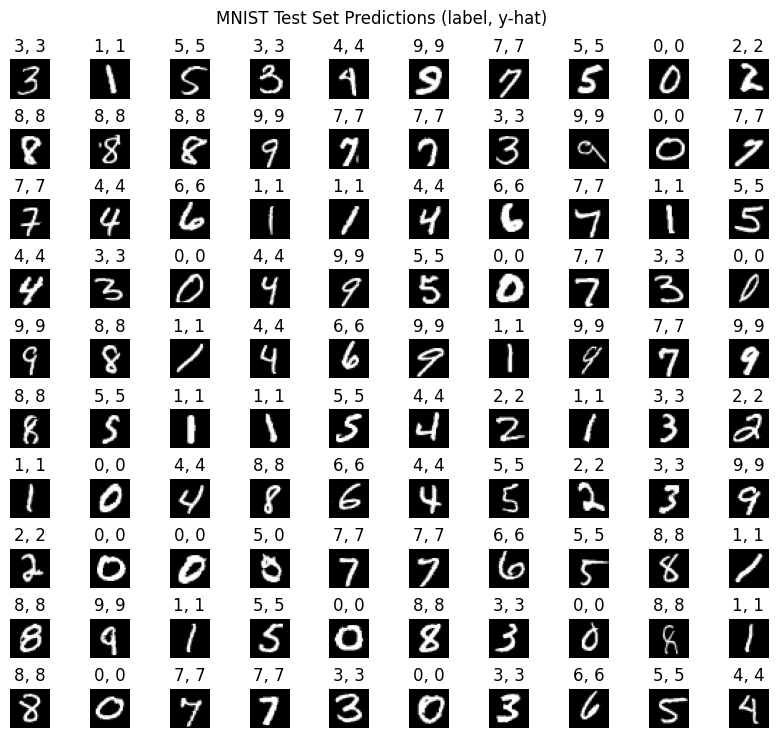

In [8]:
# Visualize model predictions on test set
fig, axs = plt.subplots(10, 10, figsize=(8,8))
fig.suptitle("MNIST Test Set Predictions (label, y-hat)")
fig.tight_layout(pad=0.1, rect=[0, 0.05, 1, 0.95])

for i, ax in enumerate(axs.flat):
    random_test_index = np.random.randint(x_test.shape[0])
    random_test_x = x_test[random_test_index]
    random_test_y = y_test[random_test_index]
    
    random_test_x_batch = np.expand_dims(random_test_x, axis=0)
    random_test_prob = model.predict(random_test_x_batch) # prediction (vector of probabilities)
    
    predicted_digit = np.argmax(random_test_prob) # y-hat (highest probability value)
    actual_digit = random_test_y # label
    
    ax.imshow(random_test_x, cmap='gray')
    ax.set_title(f"{actual_digit}, {predicted_digit}")
    ax.set_axis_off()